In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

In [ ]:
HCHO_dataset=pd.read_csv("/content/HCHO_Emissions_Data_with_cities.csv")

In [ ]:
Temperature_dataset=pd.read_csv("/content/Precipitation_Avg-temperature.csv")

In [ ]:
SLweather_dataset = pd.read_csv('/content/SriLanka_Weather_Dataset.csv')

In [ ]:
Population_density_dataset = pd.read_csv('/content/population_density_5cities.csv')

In [ ]:
Temperature_dataset

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-02,0.00,78,NaN,72.0
1,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-03,0.00,81,87.0,71.0
2,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-04,0.00,83,88.0,69.0
3,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-05,0.00,84,90.0,65.0
4,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-06,0.00,82,88.0,71.0
...,...,...,...,...,...,...,...,...,...,...
8740,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-27,0.00,81,90.0,76.0
8741,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-28,0.01,80,87.0,NaN
8742,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-29,0.52,80,86.0,76.0
8743,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-30,0.48,78,87.0,NaN


In [ ]:
SLweather_dataset

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,01/01/2010,2,30.0,22.7,26.1,34.4,25.2,29.2,2010-01-01T00:52,2010-01-01T12:35,...,0,11.7,27.4,20,4.58,7.000000,79.899994,16,Sri Lanka,Colombo
1,01/02/2010,51,29.9,23.5,26.2,33.8,26.2,29.8,2010-01-02T00:52,2010-01-02T12:36,...,1,13.0,27.0,24,3.84,7.000000,79.899994,16,Sri Lanka,Colombo
2,01/03/2010,51,29.5,23.2,26.0,34.3,26.3,29.9,2010-01-03T00:53,2010-01-03T12:36,...,3,12.3,27.4,16,3.65,7.000000,79.899994,16,Sri Lanka,Colombo
3,01/04/2010,2,28.9,21.9,25.3,31.6,23.4,27.8,2010-01-04T00:53,2010-01-04T12:37,...,0,17.0,34.6,356,3.79,7.000000,79.899994,16,Sri Lanka,Colombo
4,01/05/2010,1,28.1,21.3,24.5,30.1,23.1,26.1,2010-01-05T00:53,2010-01-05T12:37,...,0,18.7,37.1,355,4.97,7.000000,79.899994,16,Sri Lanka,Colombo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147475,6/13/2023,63,29.2,24.7,26.6,35.4,29.2,31.6,2023-06-13T00:24,2023-06-13T12:55,...,23,15.6,43.6,229,3.41,6.900002,80.000000,20,Sri Lanka,Oruwala
147476,6/14/2023,61,29.1,25.4,26.9,34.3,30.4,32.0,2023-06-14T00:24,2023-06-14T12:55,...,19,16.4,40.0,224,3.00,6.900002,80.000000,20,Sri Lanka,Oruwala
147477,6/15/2023,51,29.8,25.5,27.3,36.6,30.7,32.7,2023-06-15T00:24,2023-06-15T12:56,...,17,12.6,32.4,218,3.21,6.900002,80.000000,20,Sri Lanka,Oruwala
147478,6/16/2023,53,30.5,25.5,27.7,36.2,30.1,32.4,2023-06-16T00:25,2023-06-16T12:56,...,24,20.5,41.8,236,3.97,6.900002,80.000000,20,Sri Lanka,Oruwala


In [ ]:
Temperature_dataset['NAME'].value_counts()

NAME
COLOMBO, CE         1765
NUWARA ELIYA, CE    1761
CHINA BAY, CE       1760
PUTTALAM, CE        1755
KURUNEGALA, CE      1704
Name: count, dtype: int64

In [ ]:
HCHO_dataset["City"].value_counts()

City
Colombo Proper         1826
Deniyaya, Matara       1826
Nuwara Eliya Proper    1826
Kandy Proper           1826
Bibile, Monaragala     1826
Kurunegala Proper      1826
Jaffna Proper          1826
Name: count, dtype: int64

In [ ]:
SLweather_dataset['city'].value_counts()

city
Colombo                      4916
Mount Lavinia                4916
Hambantota                   4916
Hatton                       4916
Mabole                       4916
Kurunegala                   4916
Pothuhera                    4916
Mannar                       4916
Matale                       4916
Bentota                      4916
Kalutara                     4916
Badulla                      4916
Puttalam                     4916
Gampaha                      4916
Kolonnawa                    4916
Matara                       4916
Weligama                     4916
Athurugiriya                 4916
Jaffna                       4916
Galle                        4916
Trincomalee                  4916
Kalmunai                     4916
Sri Jayewardenepura Kotte    4916
Negombo                      4916
Kandy                        4916
Ratnapura                    4916
Maharagama                   4916
Moratuwa                     4916
Kesbewa                      4916
Oruwala  

In [ ]:
# Define a dictionary with old names as keys and new names as values
rename_dict = {
    'COLOMBO, CE': 'Colombo',
    'NUWARA ELIYA, CE': 'Nuwara Eliya',
    'KURUNEGALA, CE': 'Kurunegala'
}

# Use the replace method to update the names
Temperature_dataset['NAME'] = Temperature_dataset['NAME'].replace(rename_dict)


In [ ]:
Temperature_dataset['NAME'].value_counts()

NAME
Colombo          1765
Nuwara Eliya     1761
CHINA BAY, CE    1760
PUTTALAM, CE     1755
Kurunegala       1704
Name: count, dtype: int64

In [ ]:
# Define a dictionary with old names as keys and new names as values
rename_dict = {
    'Colombo Proper': 'Colombo',
    'Nuwara Eliya Proper': 'Nuwara Eliya',
    'Kurunegala Proper': 'Kurunegala',
    'Kandy Proper':'Kandy',
    'Deniyaya, Matara':'Matara',
    'Jaffna Proper':'Jaffna'

}

# Use the replace method to update the names
HCHO_dataset["City"] = HCHO_dataset["City"].replace(rename_dict)


In [ ]:
HCHO_dataset["City"].value_counts()

City
Colombo               1826
Matara                1826
Nuwara Eliya          1826
Kandy                 1826
Bibile, Monaragala    1826
Kurunegala            1826
Jaffna                1826
Name: count, dtype: int64

In [ ]:
Temperature_dataset.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
PRCP         float64
TAVG           int64
TMAX         float64
TMIN         float64
dtype: object

In [ ]:
Temperature_dataset['DATE']=pd.to_datetime(Temperature_dataset['DATE'])

In [ ]:
HCHO_dataset.dtypes

Start_date                     object
index                           int64
City                           object
HCHO_Column_Number_Density    float64
End_date                       object
dtype: object

In [ ]:
HCHO_dataset['Start_date'] = pd.to_datetime(HCHO_dataset['Start_date'])
HCHO_dataset['End_date'] = pd.to_datetime(HCHO_dataset['End_date'])

In [ ]:
SLweather_dataset.dtypes

time                           object
weathercode                     int64
temperature_2m_max            float64
temperature_2m_min            float64
temperature_2m_mean           float64
apparent_temperature_max      float64
apparent_temperature_min      float64
apparent_temperature_mean     float64
sunrise                        object
sunset                         object
shortwave_radiation_sum       float64
precipitation_sum             float64
rain_sum                      float64
snowfall_sum                    int64
precipitation_hours             int64
windspeed_10m_max             float64
windgusts_10m_max             float64
winddirection_10m_dominant      int64
et0_fao_evapotranspiration    float64
latitude                      float64
longitude                     float64
elevation                       int64
country                        object
city                           object
dtype: object

In [ ]:
SLweather_dataset['time'] = pd.to_datetime(SLweather_dataset['time'])
SLweather_dataset['sunrise'] = pd.to_datetime(SLweather_dataset['sunrise'], format='%Y-%m-%dT%H:%M')
SLweather_dataset['sunset'] = pd.to_datetime(SLweather_dataset['sunset'])


In [ ]:
SLweather_dataset['city'].value_counts()

city
Colombo                      4916
Mount Lavinia                4916
Hambantota                   4916
Hatton                       4916
Mabole                       4916
Kurunegala                   4916
Pothuhera                    4916
Mannar                       4916
Matale                       4916
Bentota                      4916
Kalutara                     4916
Badulla                      4916
Puttalam                     4916
Gampaha                      4916
Kolonnawa                    4916
Matara                       4916
Weligama                     4916
Athurugiriya                 4916
Jaffna                       4916
Galle                        4916
Trincomalee                  4916
Kalmunai                     4916
Sri Jayewardenepura Kotte    4916
Negombo                      4916
Kandy                        4916
Ratnapura                    4916
Maharagama                   4916
Moratuwa                     4916
Kesbewa                      4916
Oruwala  

In [ ]:
# Extract rows where the NAME column is 'Colombo'
location_list=['Colombo','Matara','Nuwara Eliya','Kandy','Kurunegala','Jaffna']

In [ ]:
Temperature_dataset = Temperature_dataset[Temperature_dataset['NAME'].isin(location_list) & (Temperature_dataset['DATE'].dt.year >= 2019) & (Temperature_dataset['DATE'].dt.year <= 2023)]

In [ ]:
Temperature_dataset["DATE"].dt.year.value_counts()

DATE
2020    1098
2023    1089
2021    1079
2019    1013
2022     951
Name: count, dtype: int64

In [ ]:
# Strip whitespace from all string columns
SLweather_dataset = SLweather_dataset.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
SLweather_dataset = SLweather_dataset[
    (SLweather_dataset['city'].isin(location_list)) &
    (SLweather_dataset['time'].dt.year >= 2019) &
    (SLweather_dataset['time'].dt.year <= 2023)
]


In [ ]:
SLweather_dataset['city'].value_counts()

city
Colombo       1629
Kandy         1629
Jaffna        1629
Matara        1629
Kurunegala    1629
Name: count, dtype: int64

In [ ]:
HCHO_dataset['City'].value_counts()

City
Colombo               1826
Matara                1826
Nuwara Eliya          1826
Kandy                 1826
Bibile, Monaragala    1826
Kurunegala            1826
Jaffna                1826
Name: count, dtype: int64

In [ ]:
# Renaming columns
SLweather_dataset.rename(columns={'city': 'City', 'time': 'Start_date'}, inplace=True)

In [ ]:
SLweather_dataset["City"].value_counts()

City
Colombo       1629
Kandy         1629
Jaffna        1629
Matara        1629
Kurunegala    1629
Name: count, dtype: int64

In [ ]:
# Merge on 'city' and 'date'
Merged_dataset = pd.merge(HCHO_dataset, SLweather_dataset, on=['City', 'Start_date'], how='inner')

In [ ]:
# Extract the year from 'Start_date' and create a new column
Merged_dataset['Year'] = Merged_dataset['Start_date'].dt.year

#Population_density_dataset 'City' and 'Year' columns
Merged_dataset = pd.merge(Population_density_dataset, Merged_dataset, on=['City', 'Year'], how='inner')

In [ ]:
# Delete the 'Year' column from the merged DataFrame
Merged_dataset.drop('Year', axis=1, inplace=True)

In [ ]:
Merged_dataset.isnull().sum()

City                          0
Population_Density            0
Start_date                    0
index                         0
HCHO_Column_Number_Density    0
End_date                      0
weathercode                   0
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
apparent_temperature_max      0
apparent_temperature_min      0
apparent_temperature_mean     0
sunrise                       0
sunset                        0
shortwave_radiation_sum       0
precipitation_sum             0
rain_sum                      0
snowfall_sum                  0
precipitation_hours           0
windspeed_10m_max             0
windgusts_10m_max             0
winddirection_10m_dominant    0
et0_fao_evapotranspiration    0
latitude                      0
longitude                     0
elevation                     0
country                       0
dtype: int64

In [ ]:
Download_dataset= Merged_dataset.copy()
Download_dataset.drop(['temperature_2m_min', 'apparent_temperature_min','sunrise','sunset','shortwave_radiation_sum','precipitation_sum','rain_sum','snowfall_sum','winddirection_10m_dominant','elevation'], axis=1, inplace=True)
Download_dataset.to_csv("Download_dataset_with_cities.csv",index=False)

In [ ]:
Merged_dataset = Merged_dataset.drop(columns='country')

In [ ]:
Merged_dataset.shape

(8145, 27)

In [ ]:
Merged_dataset['City'] = pd.factorize(Merged_dataset['City'])[0]

In [ ]:
Merged_dataset['City'].value_counts()

City
0    1629
1    1629
2    1629
3    1629
4    1629
Name: count, dtype: int64

In [ ]:
cols = Merged_dataset.columns.tolist()

cols.insert(0, cols.pop(4))

# Reorder the DataFrame
Merged_dataset = Merged_dataset[cols]


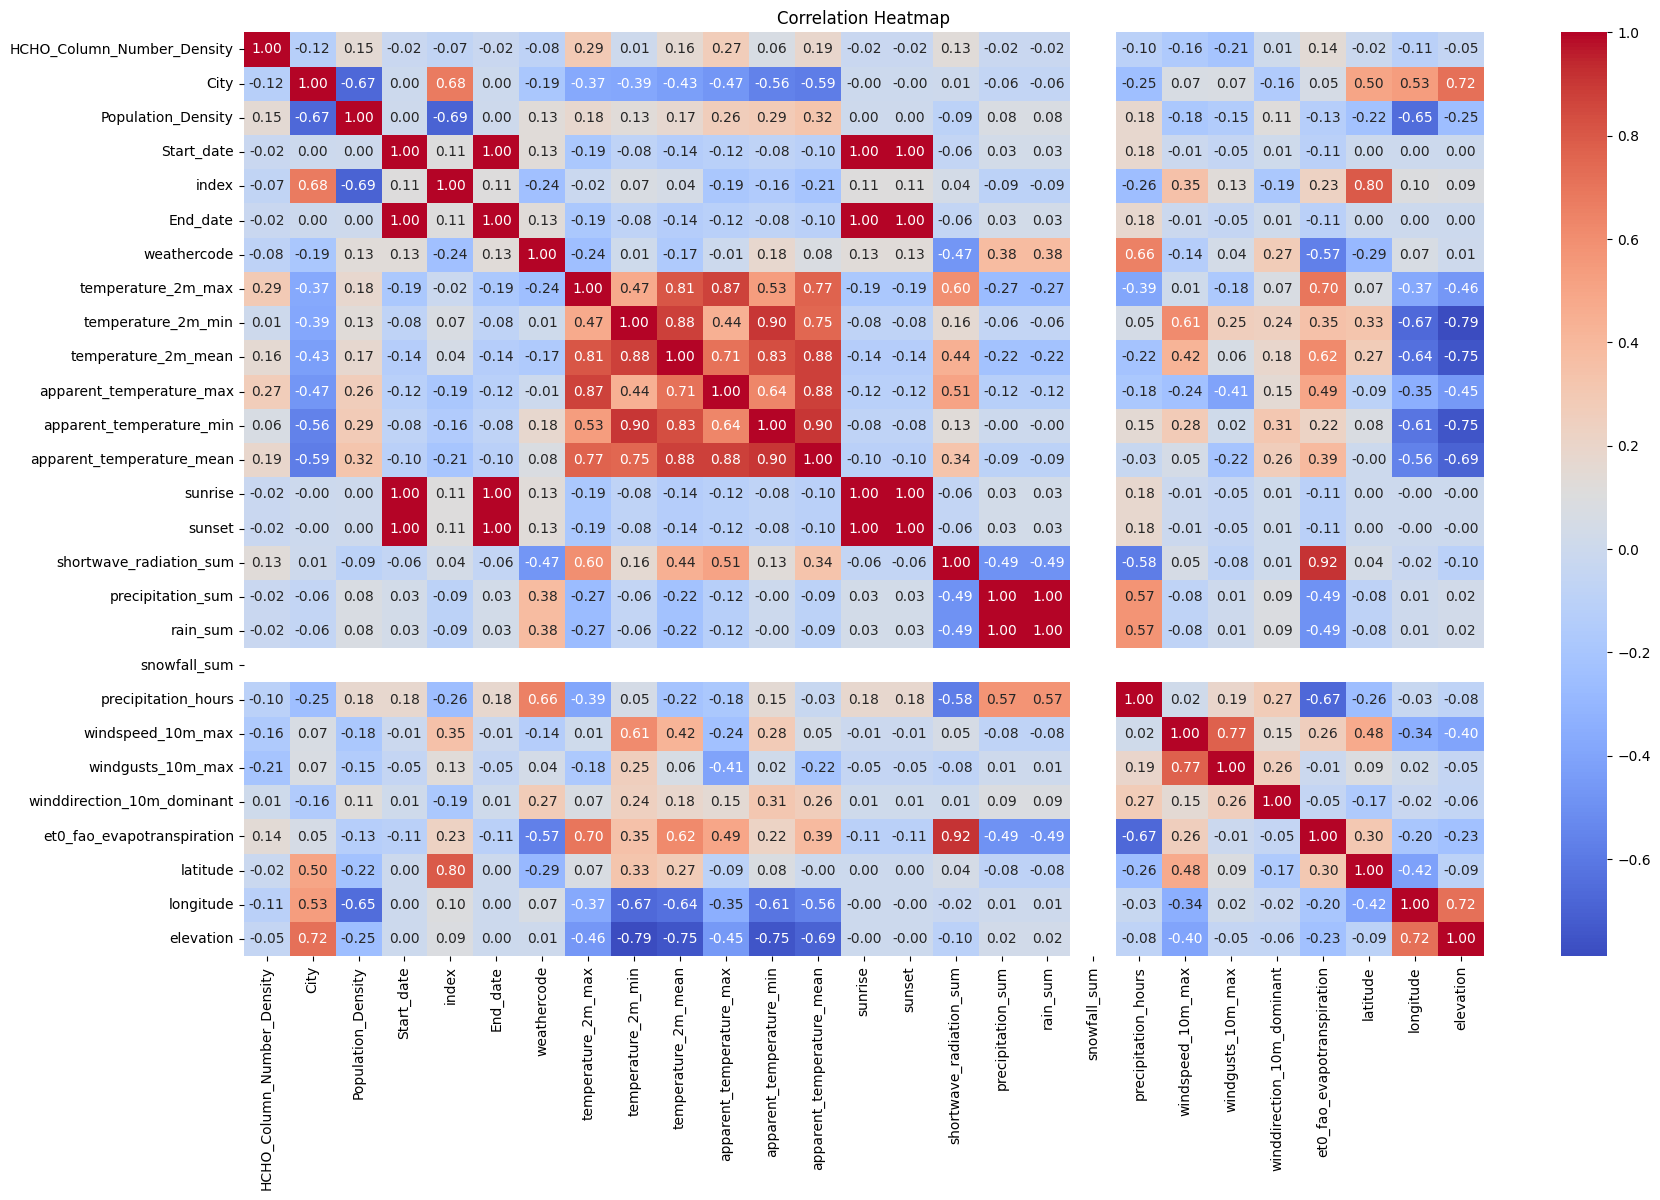

In [ ]:
# Calculate correlation matrix
correlation_matrix = Merged_dataset.corr()

# Plot heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
Merged_dataset.columns

Index(['HCHO_Column_Number_Density', 'City', 'Population_Density',
       'Start_date', 'index', 'End_date', 'weathercode', 'temperature_2m_max',
       'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_max',
       'apparent_temperature_min', 'apparent_temperature_mean', 'sunrise',
       'sunset', 'shortwave_radiation_sum', 'precipitation_sum', 'rain_sum',
       'snowfall_sum', 'precipitation_hours', 'windspeed_10m_max',
       'windgusts_10m_max', 'winddirection_10m_dominant',
       'et0_fao_evapotranspiration', 'latitude', 'longitude', 'elevation'],
      dtype='object')

In [ ]:
Merged_dataset.drop(['temperature_2m_min', 'apparent_temperature_min','sunrise','sunset','shortwave_radiation_sum','precipitation_sum','rain_sum','snowfall_sum','winddirection_10m_dominant','elevation'], axis=1, inplace=True)

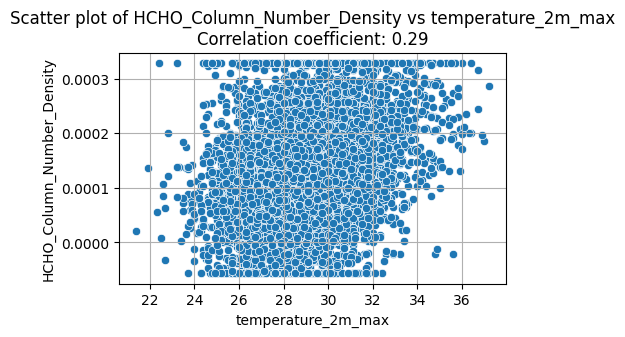

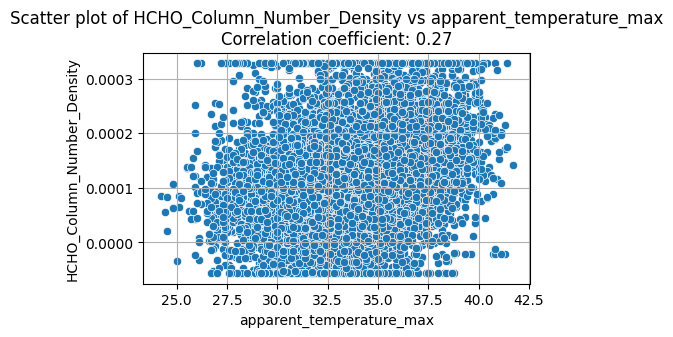

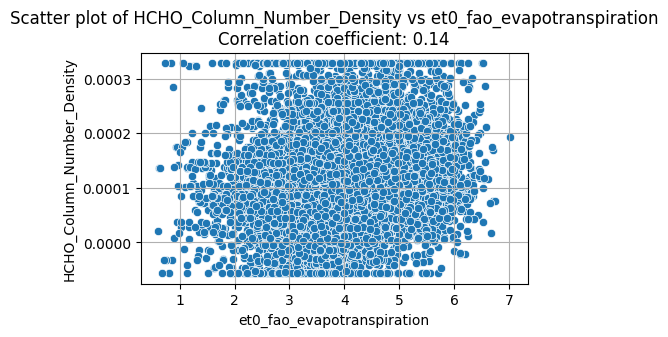

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

def plot_correlation(df, x, y):
    """Plot scatter plot and display Pearson correlation coefficient."""
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=x, y=y, data=df)

    # Calculate Pearson Correlation
    corr, _ = pearsonr(df[x], df[y])

    # Title to include the correlation
    plt.title(f'Scatter plot of {y} vs {x}\nCorrelation coefficient: {corr:.2f}')

    # Labeling Axes
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()


plot_correlation(Merged_dataset, 'temperature_2m_max', 'HCHO_Column_Number_Density')

plot_correlation(Merged_dataset, 'apparent_temperature_max', 'HCHO_Column_Number_Density')

plot_correlation(Merged_dataset, 'et0_fao_evapotranspiration', 'HCHO_Column_Number_Density')



In [ ]:
# Renaming columns
Temperature_dataset.rename(columns={'NAME': 'City', 'DATE': 'Start_date'}, inplace=True)

<ipython-input-378-e81941872708>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Temperature_dataset.rename(columns={'NAME': 'City', 'DATE': 'Start_date'}, inplace=True)


In [ ]:
# Merge on 'city' and 'date'
Merged_with_temperature_dataset = pd.merge(HCHO_dataset, Temperature_dataset, on=['City', 'Start_date'], how='inner')

In [ ]:
Merged_with_temperature_dataset.isnull().sum()

Start_date                      0
index                           0
City                            0
HCHO_Column_Number_Density      0
End_date                        0
STATION                         0
LATITUDE                        0
LONGITUDE                       0
ELEVATION                       0
PRCP                           17
TAVG                            0
TMAX                          583
TMIN                          926
dtype: int64

In [ ]:
# Calculate the mean temperature for each city and fill NaN values in 'Temperature' using these means
Merged_with_temperature_dataset['PRCP'] = Merged_with_temperature_dataset.groupby('City')['PRCP'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# Calculate the mean temperature for each city and fill NaN values in 'Temperature' using these means
Merged_with_temperature_dataset['TMAX'] = Merged_with_temperature_dataset.groupby('City')['TMAX'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# Calculate the mean temperature for each city and fill NaN values in 'Temperature' using these means
Merged_with_temperature_dataset['TMIN'] = Merged_with_temperature_dataset.groupby('City')['TMIN'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# Extract the year from 'Start_date' and create a new column
Merged_with_temperature_dataset['Year'] = Merged_with_temperature_dataset['Start_date'].dt.year

#Population_density_dataset 'City' and 'Year' columns
Merged_with_temperature_dataset = pd.merge(Population_density_dataset, Merged_with_temperature_dataset, on=['City', 'Year'], how='inner')


In [ ]:
# Delete the 'Year' column from the merged DataFrame
Merged_with_temperature_dataset.drop('Year', axis=1, inplace=True)

In [ ]:
Merged_with_temperature_dataset.isnull().sum()

City                          0
Population_Density            0
Start_date                    0
index                         0
HCHO_Column_Number_Density    0
End_date                      0
STATION                       0
LATITUDE                      0
LONGITUDE                     0
ELEVATION                     0
PRCP                          0
TAVG                          0
TMAX                          0
TMIN                          0
dtype: int64

In [ ]:
Merged_with_temperature_dataset['City'] = pd.factorize(Merged_with_temperature_dataset['City'])[0]

In [ ]:
Merged_with_temperature_dataset = Merged_with_temperature_dataset.drop(columns='STATION')

In [ ]:
cols = Merged_with_temperature_dataset.columns.tolist()

cols.insert(0, cols.pop(2))

# Reorder the DataFrame
Merged_with_temperature_dataset = Merged_with_temperature_dataset[cols]


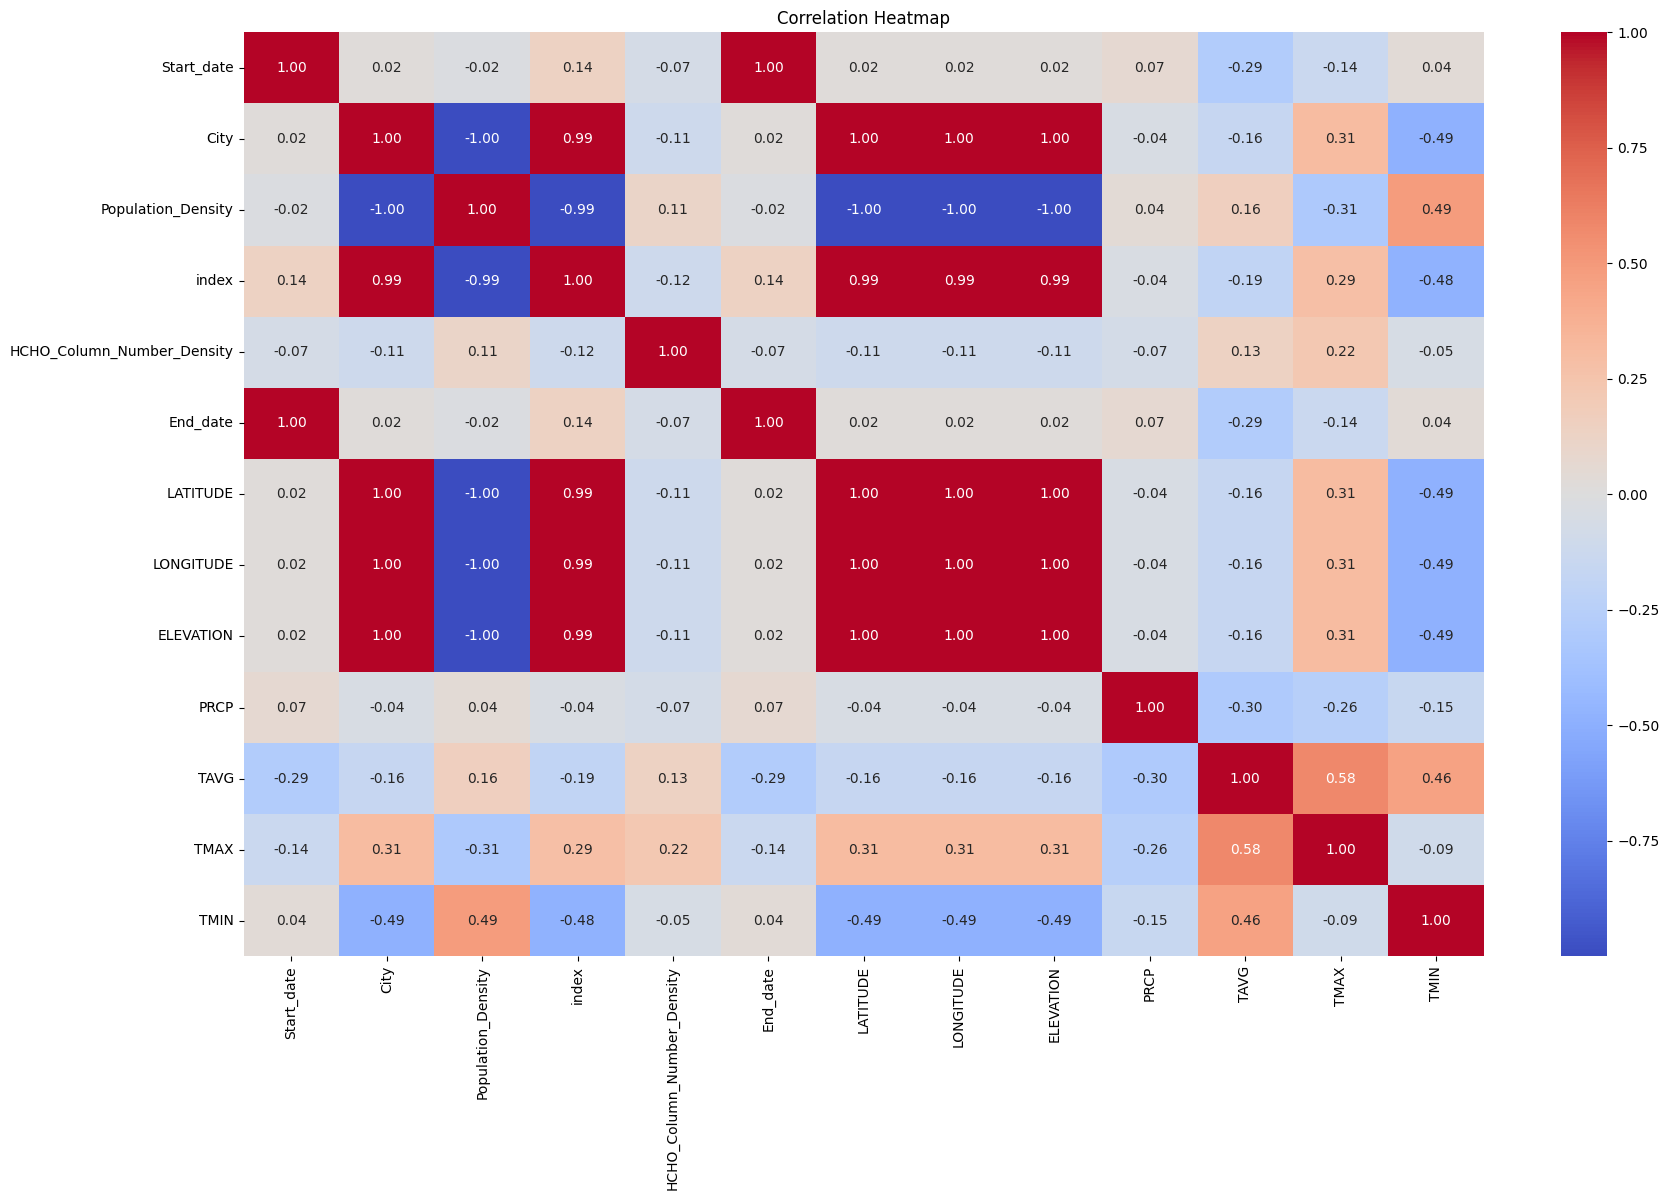

In [ ]:
# Calculate correlation matrix
correlation_matrix = Merged_with_temperature_dataset.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

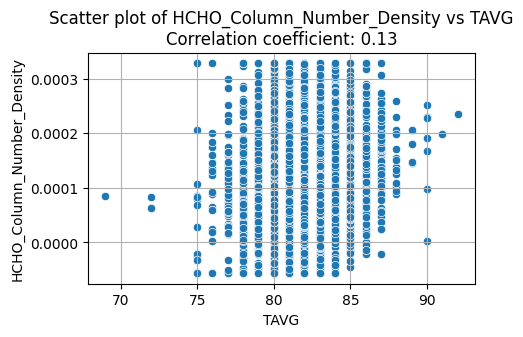

In [ ]:
plot_correlation(Merged_with_temperature_dataset, 'TAVG', 'HCHO_Column_Number_Density')

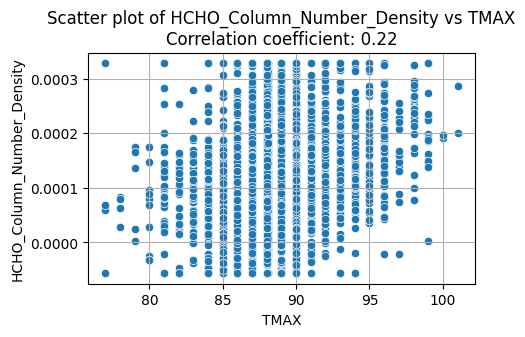

In [ ]:
plot_correlation(Merged_with_temperature_dataset, 'TMAX', 'HCHO_Column_Number_Density')

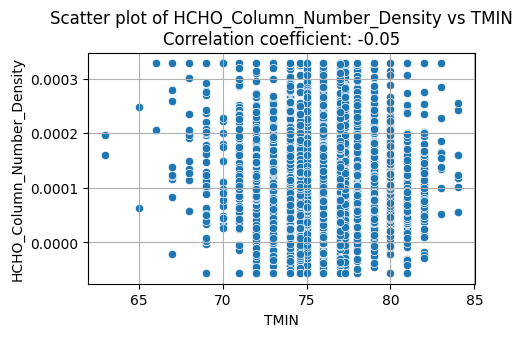

In [ ]:
plot_correlation(Merged_with_temperature_dataset, 'TMIN', 'HCHO_Column_Number_Density')

In [ ]:
Merged_dataset.to_csv('HCHO_Emissions_to_model.csv', index=False)
